In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
olympic_df = pd.read_csv('../Resources/Machine_Learning_datasetv2.csv')
olympic_df = olympic_df.drop(['Unnamed: 0', 'athlete_count_y'], axis=1)
olympic_df = olympic_df.rename(columns={'GDP per capita': 'gdp_per_capita'})
summer_olympic_df = olympic_df[olympic_df['Season'] == 'Summer']
summer_olympic_df

,NOC,Year,Season,Host,athlete_count_x,Population,gdp_per_capita,Gold,Silver,Bronze,country_medal_total,olympic_total,medal_share,athlete_share
0,AFG,1960,Summer,0,13,8996967.0,1326.0,0.0,0.0,0.0,0.0,297.0,0.000000,0.002466
1,ARG,1960,Summer,0,78,20481781.0,8861.0,0.0,1.0,1.0,2.0,297.0,0.006734,0.014795
2,AUS,1960,Summer,0,201,10276477.0,14013.0,8.0,8.0,6.0,22.0,297.0,0.074074,0.038126
3,AUT,1960,Summer,0,161,7047539.0,10391.0,1.0,1.0,0.0,2.0,297.0,0.006734,0.030539
4,BEL,1960,Summer,0,103,9153489.0,11081.0,0.0,2.0,2.0,4.0,297.0,0.013468,0.019537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,TTO,1976,Summer,0,14,1025104.0,15696.0,1.0,0.0,0.0,1.0,338.0,0.002959,0.002875
2174,TUN,1976,Summer,0,5,5786482.0,4095.0,0.0,0.0,0.0,0.0,338.0,0.000000,0.001027
2175,TUR,1976,Summer,0,28,40189561.0,6110.0,0.0,0.0,0.0,0.0,338.0,0.000000,0.005749
2176,USA,1976,Summer,0,445,218035000.0,27058.0,34.0,35.0,25.0,94.0,338.0,0.278107,0.091376


In [3]:
# selecting summer 2016 actual medals

summer_olympic_actual_df = summer_olympic_df[summer_olympic_df['Year'] == 2016]

In [4]:
#Selecting columns for summer 2016 actual medals
summer_olympic_actual_df = summer_olympic_actual_df[['country_medal_total']]



In [5]:
# Removing 2016
summer_olympics_test_df = summer_olympic_df[summer_olympic_df['Year'] != 2016]

In [6]:
# Summer olympics machine learning dataframe
summer_olympics_test_df = summer_olympics_test_df.drop(['NOC', 'Year', 'Season', 'athlete_count_x', 'Gold', 'Silver', 'Bronze', 'country_medal_total', 'olympic_total'], axis=1)
summer_olympics_test_df

,Host,Population,gdp_per_capita,medal_share,athlete_share
0,0,8996967.0,1326.0,0.000000,0.002466
1,0,20481781.0,8861.0,0.006734,0.014795
2,0,10276477.0,14013.0,0.074074,0.038126
3,0,7047539.0,10391.0,0.006734,0.030539
4,0,9153489.0,11081.0,0.013468,0.019537
...,...,...,...,...,...
2173,0,1025104.0,15696.0,0.002959,0.002875
2174,0,5786482.0,4095.0,0.000000,0.001027
2175,0,40189561.0,6110.0,0.000000,0.005749
2176,0,218035000.0,27058.0,0.278107,0.091376


In [7]:
# independent and dependent variables
X = summer_olympics_test_df[['Population', 'gdp_per_capita', 'Host', 'athlete_share']]
y = summer_olympics_test_df[['medal_share']]

In [8]:
# Create and fit the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=89)
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6644397259861161
Testing Score: 0.6642798856921883


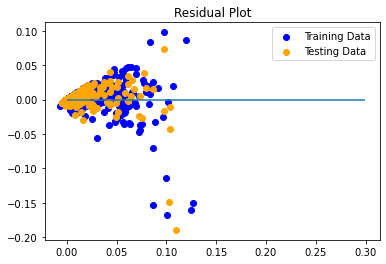

In [9]:
# Plot the residuals for the training and testing data.

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

In [10]:
# 2016 predicted dataset
summer_olympic_predicted_df = summer_olympic_df[summer_olympic_df['Year'] == 2016]
summer_olympic_predicted_df = summer_olympic_predicted_df.drop(['NOC', 'athlete_count_x', 'Gold', 'Silver', 'Bronze', 'country_medal_total', 'olympic_total', 'medal_share'], axis=1)
summer_olympic_predicted_df = summer_olympic_predicted_df[['Population', 'gdp_per_capita', 'Host', 'athlete_share']]
summer_olympic_predicted_df

,Population,gdp_per_capita,Host,athlete_share
1158,35383028.0,1929.0,0,0.000306
1159,2876101.0,10342.0,0,0.000612
1160,40551398.0,14331.0,0,0.005818
1161,28842482.0,8453.0,0,0.001123
1162,43590368.0,18875.0,0,0.011227
...,...,...,...,...
1314,29851249.0,15219.0,0,0.009798
1315,93640435.0,6062.0,0,0.002858
1316,27168210.0,2506.0,0,0.000306
1317,16363449.0,3479.0,0,0.000714


In [11]:
# Predictions
summer_predictions = model.predict(summer_olympic_predicted_df)
summer_predictions_df = pd.DataFrame(summer_predictions, summer_olympic_predicted_df.index)
summer_predictions_df.columns =['medal_share_predicted']
summer_predictions_df

,medal_share_predicted
1158,-0.002855
1159,-0.003305
1160,0.004547
1161,-0.002044
1162,0.012016
...,...
1314,0.009878
1315,0.001672
1316,-0.003028
1317,-0.002691


In [12]:
# Merge dataframes
summer_predicted_df = summer_olympic_predicted_df.merge(summer_predictions_df, left_index=True, right_index=True )
summer_predicted_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted
1158,35383028.0,1929.0,0,0.000306,-0.002855
1159,2876101.0,10342.0,0,0.000612,-0.003305
1160,40551398.0,14331.0,0,0.005818,0.004547
1161,28842482.0,8453.0,0,0.001123,-0.002044
1162,43590368.0,18875.0,0,0.011227,0.012016
...,...,...,...,...,...
1314,29851249.0,15219.0,0,0.009798,0.009878
1315,93640435.0,6062.0,0,0.002858,0.001672
1316,27168210.0,2506.0,0,0.000306,-0.003028
1317,16363449.0,3479.0,0,0.000714,-0.002691


In [13]:
# Setting minimum medals at 0
summer_predicted_df['positive_medal_share'] = np.where(summer_predicted_df['medal_share_predicted'] < 0, 0, summer_predicted_df['medal_share_predicted'])
summer_predicted_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted,positive_medal_share
1158,35383028.0,1929.0,0,0.000306,-0.002855,0.000000
1159,2876101.0,10342.0,0,0.000612,-0.003305,0.000000
1160,40551398.0,14331.0,0,0.005818,0.004547,0.004547
1161,28842482.0,8453.0,0,0.001123,-0.002044,0.000000
1162,43590368.0,18875.0,0,0.011227,0.012016,0.012016
...,...,...,...,...,...,...
1314,29851249.0,15219.0,0,0.009798,0.009878,0.009878
1315,93640435.0,6062.0,0,0.002858,0.001672,0.001672
1316,27168210.0,2506.0,0,0.000306,-0.003028,0.000000
1317,16363449.0,3479.0,0,0.000714,-0.002691,0.000000


In [14]:
# Determine predicted medal counts with 957 total medals from 2016 summer olympics
summer_predicted_df['predicted_medals'] = summer_predicted_df['positive_medal_share'] * 957
summer_predicted_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted,positive_medal_share,predicted_medals
1158,35383028.0,1929.0,0,0.000306,-0.002855,0.000000,0.000000
1159,2876101.0,10342.0,0,0.000612,-0.003305,0.000000,0.000000
1160,40551398.0,14331.0,0,0.005818,0.004547,0.004547,4.351654
1161,28842482.0,8453.0,0,0.001123,-0.002044,0.000000,0.000000
1162,43590368.0,18875.0,0,0.011227,0.012016,0.012016,11.499407
...,...,...,...,...,...,...,...
1314,29851249.0,15219.0,0,0.009798,0.009878,0.009878,9.453286
1315,93640435.0,6062.0,0,0.002858,0.001672,0.001672,1.600468
1316,27168210.0,2506.0,0,0.000306,-0.003028,0.000000,0.000000
1317,16363449.0,3479.0,0,0.000714,-0.002691,0.000000,0.000000


In [15]:
# Add in NOCs
predicted_NOC_df = summer_olympic_df[summer_olympic_df['Year'] == 2016]
predicted_NOC_df = predicted_NOC_df[['NOC']]
predicted_NOC_df

,NOC
1158,AFG
1159,ALB
1160,ALG
1161,ANG
1162,ARG
...,...
1314,VEN
1315,VIE
1316,YEM
1317,ZAM


In [16]:
# Merge final NOC to summer predicted
summer_predicted_df = summer_predicted_df.merge(predicted_NOC_df, left_index=True, right_index=True )
summer_predicted_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted,positive_medal_share,predicted_medals,NOC
1158,35383028.0,1929.0,0,0.000306,-0.002855,0.000000,0.000000,AFG
1159,2876101.0,10342.0,0,0.000612,-0.003305,0.000000,0.000000,ALB
1160,40551398.0,14331.0,0,0.005818,0.004547,0.004547,4.351654,ALG
1161,28842482.0,8453.0,0,0.001123,-0.002044,0.000000,0.000000,ANG
1162,43590368.0,18875.0,0,0.011227,0.012016,0.012016,11.499407,ARG
...,...,...,...,...,...,...,...,...
1314,29851249.0,15219.0,0,0.009798,0.009878,0.009878,9.453286,VEN
1315,93640435.0,6062.0,0,0.002858,0.001672,0.001672,1.600468,VIE
1316,27168210.0,2506.0,0,0.000306,-0.003028,0.000000,0.000000,YEM
1317,16363449.0,3479.0,0,0.000714,-0.002691,0.000000,0.000000,ZAM


In [17]:
# create summer final dataframe

summer_ML_final_df = summer_predicted_df.merge(summer_olympic_actual_df, left_index=True, right_index=True)


In [18]:
summer_ML_final_df['Difference_Acutal_Predicted'] = summer_ML_final_df['country_medal_total'] - summer_ML_final_df['predicted_medals']
summer_ML_final_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted,positive_medal_share,predicted_medals,NOC,country_medal_total,Difference_Acutal_Predicted
1158,35383028.0,1929.0,0,0.000306,-0.002855,0.000000,0.000000,AFG,0.0,0.000000
1159,2876101.0,10342.0,0,0.000612,-0.003305,0.000000,0.000000,ALB,0.0,0.000000
1160,40551398.0,14331.0,0,0.005818,0.004547,0.004547,4.351654,ALG,2.0,-2.351654
1161,28842482.0,8453.0,0,0.001123,-0.002044,0.000000,0.000000,ANG,0.0,0.000000
1162,43590368.0,18875.0,0,0.011227,0.012016,0.012016,11.499407,ARG,4.0,-7.499407
...,...,...,...,...,...,...,...,...,...,...
1314,29851249.0,15219.0,0,0.009798,0.009878,0.009878,9.453286,VEN,3.0,-6.453286
1315,93640435.0,6062.0,0,0.002858,0.001672,0.001672,1.600468,VIE,2.0,0.399532
1316,27168210.0,2506.0,0,0.000306,-0.003028,0.000000,0.000000,YEM,0.0,0.000000
1317,16363449.0,3479.0,0,0.000714,-0.002691,0.000000,0.000000,ZAM,0.0,0.000000


In [19]:
#adding season and year columns back for viz
summer_ML_final_df['Year'] = '2016'
summer_ML_final_df['Season'] = 'summer'
summer_ML_final_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted,positive_medal_share,predicted_medals,NOC,country_medal_total,Difference_Acutal_Predicted,Year,Season
1158,35383028.0,1929.0,0,0.000306,-0.002855,0.000000,0.000000,AFG,0.0,0.000000,2016,summer
1159,2876101.0,10342.0,0,0.000612,-0.003305,0.000000,0.000000,ALB,0.0,0.000000,2016,summer
1160,40551398.0,14331.0,0,0.005818,0.004547,0.004547,4.351654,ALG,2.0,-2.351654,2016,summer
1161,28842482.0,8453.0,0,0.001123,-0.002044,0.000000,0.000000,ANG,0.0,0.000000,2016,summer
1162,43590368.0,18875.0,0,0.011227,0.012016,0.012016,11.499407,ARG,4.0,-7.499407,2016,summer
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,29851249.0,15219.0,0,0.009798,0.009878,0.009878,9.453286,VEN,3.0,-6.453286,2016,summer
1315,93640435.0,6062.0,0,0.002858,0.001672,0.001672,1.600468,VIE,2.0,0.399532,2016,summer
1316,27168210.0,2506.0,0,0.000306,-0.003028,0.000000,0.000000,YEM,0.0,0.000000,2016,summer
1317,16363449.0,3479.0,0,0.000714,-0.002691,0.000000,0.000000,ZAM,0.0,0.000000,2016,summer


In [20]:
summer_ML_final_df.to_csv('../Resources/summer_ML_final_df.csv')

In [23]:
# reading in final with merged country lat long

summer_ML_final_df = pd.read_csv('../Resources/summer_ML_final.csv')
#summer_ML_final_df = summer_ML_final_df.drop(['Unnamed: 0'], axis=1)
                                              
summer_ML_final_df
#olympic_df = olympic_df.drop(['Unnamed: 0', 'athlete_count_y'], axis=1)

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted,positive_medal_share,predicted_medals,NOC,country_medal_total,Difference_Acutal_Predicted,Year,Season,Latitude,Longitude,Country
0,35383028,1929.0,0,0.000306,-0.002855,0.000000,0.000000,AFG,0,0.000000,2016,summer,33.768006,66.238514,Afghanistan
1,2876101,10342.0,0,0.000612,-0.003305,0.000000,0.000000,ALB,0,0.000000,2016,summer,41.000028,19.999962,Albania
2,40551398,14331.0,0,0.005818,0.004547,0.004547,4.351654,ALG,2,-2.351654,2016,summer,28.000027,2.999983,Algeria
3,28842482,8453.0,0,0.001123,-0.002044,0.000000,0.000000,ANG,0,0.000000,2016,summer,-11.877577,17.569124,Angola
4,43590368,18875.0,0,0.011227,0.012016,0.012016,11.499407,ARG,4,-7.499407,2016,summer,-34.996496,-64.967282,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,29851249,15219.0,0,0.009798,0.009878,0.009878,9.453286,VEN,3,-6.453286,2016,summer,8.001871,-66.110932,Venezuela
157,93640435,6062.0,0,0.002858,0.001672,0.001672,1.600468,VIE,2,0.399532,2016,summer,13.290403,108.426511,Vietnam
158,27168210,2506.0,0,0.000306,-0.003028,0.000000,0.000000,YEM,0,0.000000,2016,summer,NaN,NaN,NaN
159,16363449,3479.0,0,0.000714,-0.002691,0.000000,0.000000,ZAM,0,0.000000,2016,summer,-14.518624,27.559916,Zambia


In [28]:
summer_ML_final_2 = summer_ML_final_df[['Year', 'Season', 'Country','NOC','Population', 'gdp_per_capita', 'athlete_share', 'Host', 'country_medal_total', 'medal_share_predicted', 'positive_medal_share','predicted_medals', 'Difference_Acutal_Predicted', 'Latitude', 'Longitude'  ]]
summer_ML_final_2.to_csv('../Resources/summer_ML_final2.csv', index=False)